In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import csv
import seaborn as sns

In [2]:
# 设置字体粗细等
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [5]:
data_6ifo = pd.read_excel("6ifo_decomposition.xlsx", sheet_name="Cas", 
                          usecols=['residue_index', 'Residue_pdb', 'Total'])
data_6ifo_rep1 = pd.read_excel("6ifo_decomposition.xlsx", sheet_name="Cas_rep1",
                               usecols=['residue_index', 'Residue_pdb', 'Total'])
data_6ifo_rep2 = pd.read_excel("6ifo_decomposition.xlsx", sheet_name="Cas_rep2",
                               usecols=['residue_index', 'Residue_pdb', 'Total']) 

In [17]:
data_5xbl = pd.read_excel("5xbl_decomposition.xlsx", sheet_name="Cas", 
                          usecols=['residue_index', 'Residue_pdb', 'Total'])
data_5xbl_rep1 = pd.read_excel("5xbl_decomposition.xlsx", sheet_name="Cas_rep1",
                               usecols=['residue_index', 'Residue_pdb', 'Total'])
data_5xbl_rep2 = pd.read_excel("5xbl_decomposition.xlsx", sheet_name="Cas_rep2",
                               usecols=['residue_index', 'Residue_pdb', 'Total']) 

In [15]:
data = pd.DataFrame({
    "index": data_6ifo.iloc[:, 0],  
    "residue": data_6ifo.iloc[:, 1], 
    "MD_1": data_6ifo.iloc[:, -1], 
    "MD_2": data_6ifo_rep1.iloc[:, -1],
    "MD_3": data_6ifo_rep2.iloc[:, -1]
})

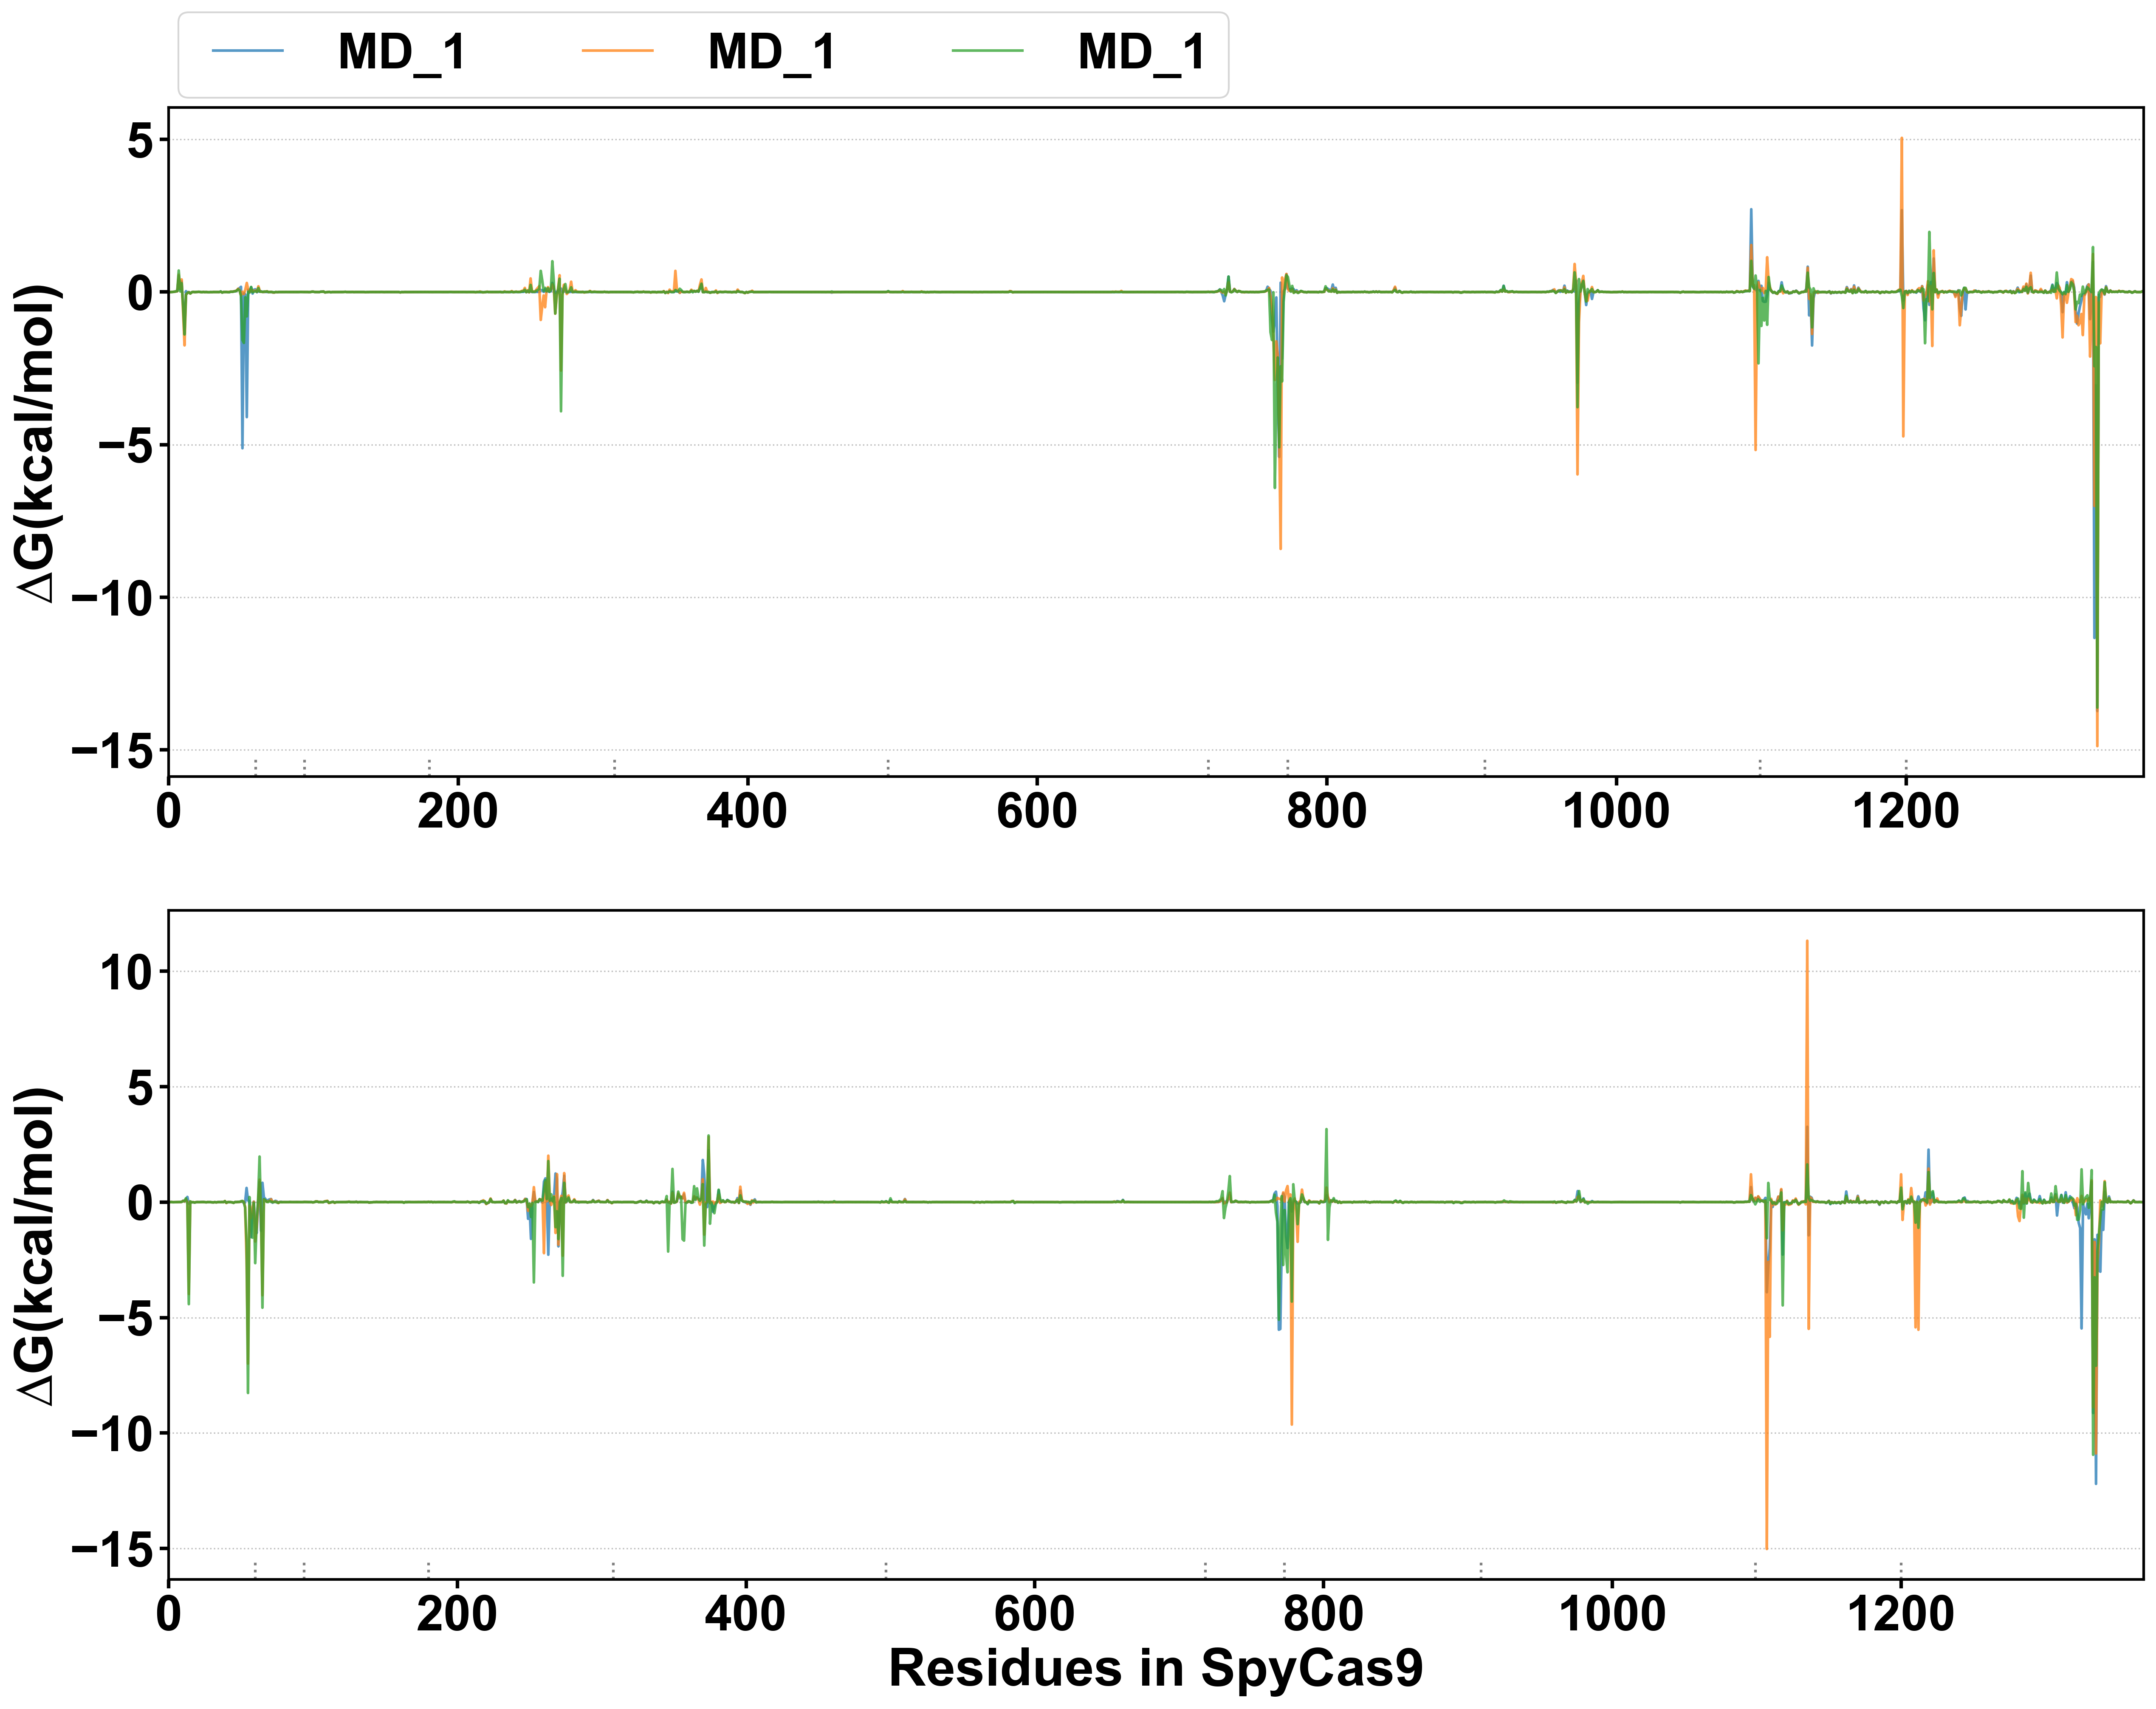

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=300, figsize=(20, 15))
#sns.set_theme(style="whitegrid")
ax1.plot( data_5xbl.iloc[:,-1], color = '#1f77b4', 
         linewidth = 1.5, alpha = 0.75, label = 'MD_1')
ax1.plot( data_5xbl_rep1.iloc[:,-1], color = '#ff7f0e', 
         linewidth = 1.5, alpha = 0.75, label = 'MD_2')
ax1.plot( data_5xbl_rep2.iloc[:,-1], color = '#2ca02c', 
         linewidth = 1.5, alpha = 0.75, label = 'MD_3')

ax1.legend(ncol = 3, bbox_to_anchor=(0, 1), loc='lower left', 
           borderaxespad=0.2, frameon = True, fontsize = 28, 
           numpoints = 20, markerscale = 10)

ax2.plot( data_6ifo.iloc[:,-1], color = '#1f77b4', 
         linewidth = 1.5, alpha = 0.75)
ax2.plot( data_6ifo_rep1.iloc[:,-1], color = '#ff7f0e', 
         linewidth = 1.5, alpha = 0.75)
ax2.plot( data_6ifo_rep2.iloc[:,-1], color = '#2ca02c', 
         linewidth = 1.5, alpha = 0.75)

ax1.set_xlim(0, len(data_5xbl))
ax2.set_xlim(0, len(data_6ifo))
ax2.set_xlabel("Residues in SpyCas9", fontsize = 30)

for ax in [ax1, ax2]:
    bwith = 1.5
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    ax.grid(axis='y', linestyle = ':', alpha=0.8)
    ax.tick_params(width=2, labelsize=28, length=5)
    ax.set_ylabel("∆G(kcal/mol)", fontsize = 30)
    #ax.axhline(0, color="k", lw = 2.0)

rec = [60, 94, 180, 308, 497, 718, 773, 909, 1099, 1200]
for i in rec:
    ax1.axvline(x = i, ymax = 0.03, ls = ':', color = 'gray', alpha = 1.0)
    ax2.axvline(x = i, ymax = 0.03, ls = ':', color = 'gray', alpha = 1.0)

fig.subplots_adjust(hspace=0.2)
plt.savefig('decomposition_all_product.tif', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
merge_5xbl = pd.read_excel("5xbl_draw_cas.xlsx", sheet_name="merge",
                           usecols=["num", "residue_index", "Residue_pdb", "Total", "error"])
merge_6ifo = pd.read_excel("6ifo_draw_cas.xlsx", sheet_name="merge",
                           usecols=["num", "residue_index", "Residue_pdb", "Total", "error"])

In [128]:
df_5xbl = merge_5xbl.copy()
df_6ifo = merge_6ifo.copy()

In [166]:
def max_abs_index(x):
    return x.abs().idxmax()
max_abs_total_idx_5xbl = df_5xbl.groupby('residue_index')['Total'].agg(max_abs_index)
df_5xbl = df_5xbl.loc[max_abs_total_idx_5xbl].reset_index(drop=True)
df_5xbl['num'] = df_5xbl['num'].rank(method='first')
df_5 = pd.DataFrame(merge_5xbl['Residue_pdb'])
duplicates = df_5[df_5.duplicated('Residue_pdb', keep='first')
                ].drop_duplicates('Residue_pdb', keep='first').reset_index(drop=True)
df_5xbl['repeate'] = duplicates
df_5xbl.loc[df_5xbl.index[-1] + 1, 'Residue_pdb'] = 0
df_5xbl

,num,residue_index,Residue_pdb,Total,error,repeate
0,1.0,14.0,Asn14,-1.748,0.933,Asn14
1,2.0,54.0,Asp54,-5.119,1.754,Asp54
2,3.0,55.0,Ser55,-1.667,0.984,Asp274
3,4.0,57.0,Glu57,-4.099,1.144,Glu766
4,5.0,268.0,Lys268,1.010,0.900,Asn767
5,6.0,274.0,Asp274,-3.908,1.474,Gln768
6,7.0,764.0,Ala764,-1.317,0.768,Thr769
7,8.0,765.0,Arg765,-1.573,0.786,Thr770
8,9.0,766.0,Glu766,-1.601,0.722,Gln771
9,10.0,767.0,Asn767,-6.420,1.141,Lys772


In [167]:
def max_abs_index(x):
    return x.abs().idxmax()
max_abs_total_idx_6ifo = df_6ifo.groupby('residue_index')['Total'].agg(max_abs_index)
df_6ifo = df_6ifo.loc[max_abs_total_idx_6ifo].reset_index(drop=True)
df_6ifo['num'] = df_6ifo['num'].rank(method='first')
df_6 = pd.DataFrame(merge_6ifo['Residue_pdb'])
duplicates = df_6[df_6.duplicated('Residue_pdb', keep='first')
                ].drop_duplicates('Residue_pdb', keep='first').reset_index(drop=True)
df_6ifo['repeate'] = duplicates
df_6ifo.loc[df_6ifo.index[-1] + 1, 'Residue_pdb'] = 0
df_6ifo

,num,residue_index,Residue_pdb,Total,error,repeate
0,1.0,14.0,Asn14,-4.418,0.865,Asn14
1,2.0,54.0,Asp54,-2.498,1.966,Asp54
2,3.0,55.0,Ser55,-8.264,1.740,Ser55
3,4.0,57.0,Glu57,-1.515,0.871,Glu60
4,5.0,58.0,Thr58,-1.540,0.358,Ala61
...,...,...,...,...,...,...
56,57.0,1336.0,Tyr1336,-2.612,1.061,NaN
57,58.0,1337.0,Thr1337,-2.952,1.053,NaN
58,59.0,1338.0,Ser1338,-3.013,2.183,NaN
59,60.0,1340.0,Lys1340,-1.204,1.203,NaN


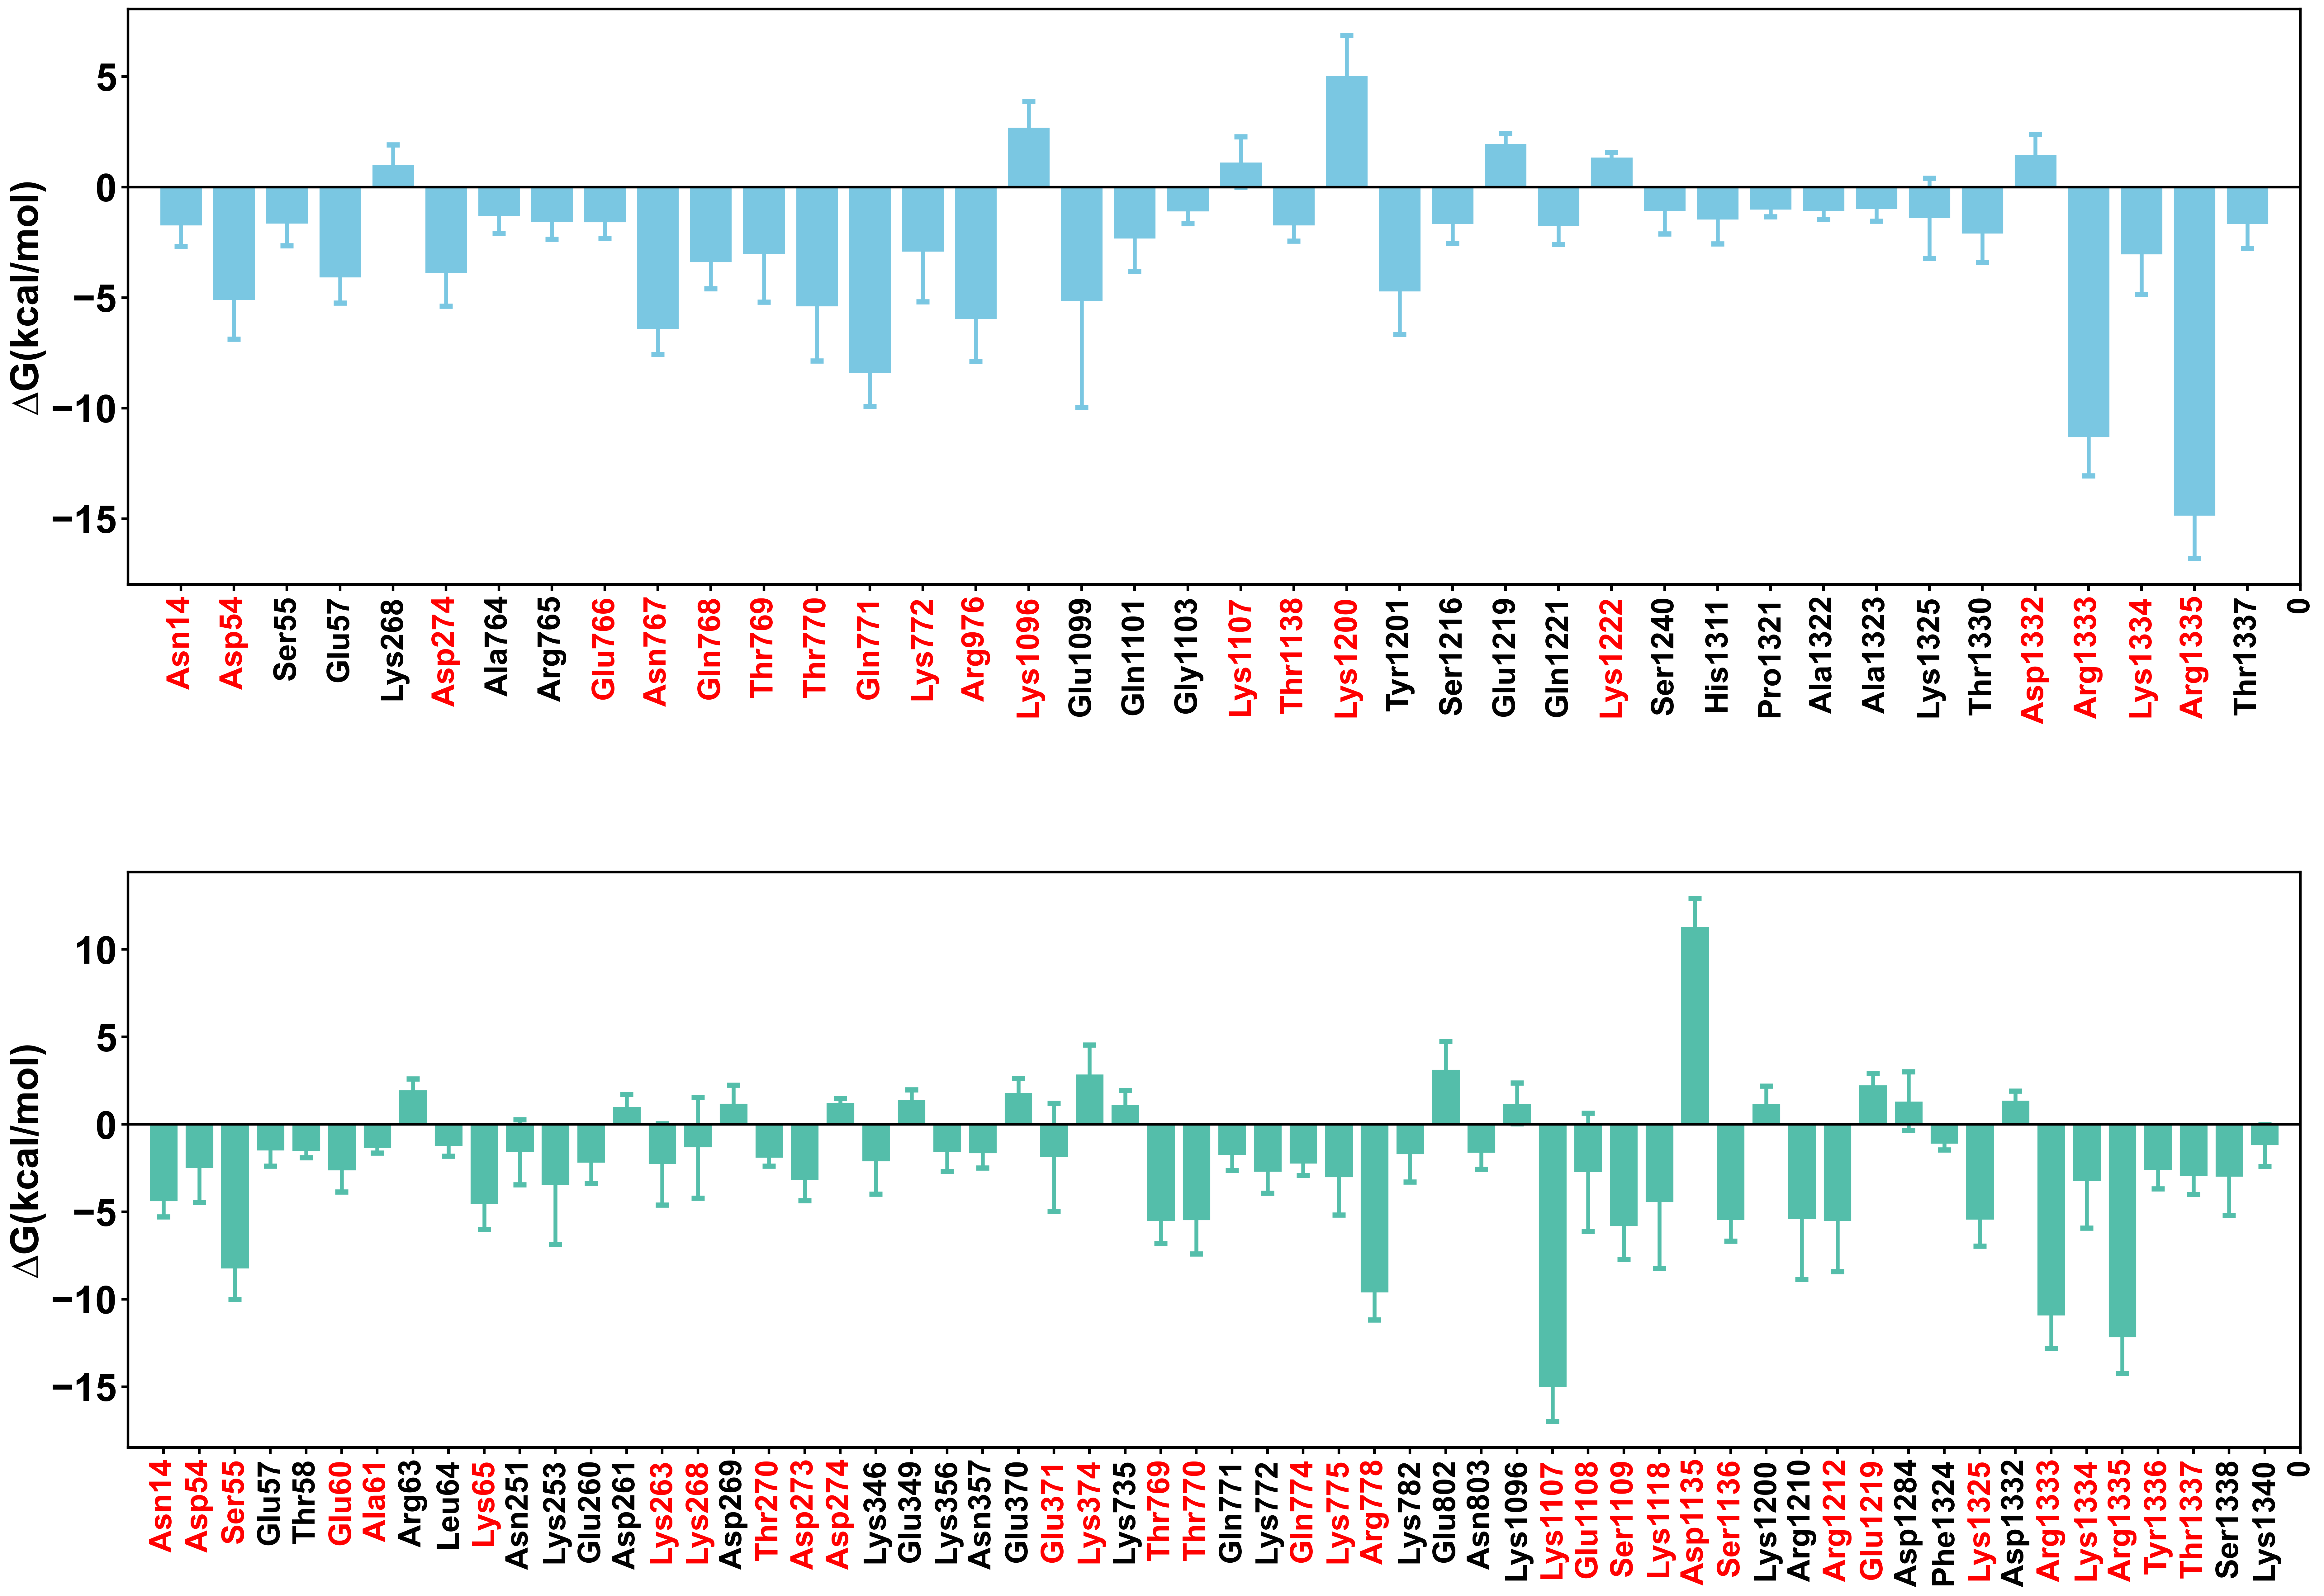

In [194]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (30, 20), dpi = 300)
#error_5xbl = [[0]*(len(df_5xbl)), df_5xbl["error"]]
error_kw_5xbl = {"ecolor":"#7ac7e2", "capsize":5, "elinewidth":3,
            "capthick":4, "barsabove":True}
ax1.bar(x=df_5xbl['num'], height=df_5xbl['Total'], 
        edgecolor="white", linewidth=0.7, color =  "#7ac7e2",
        yerr = df_5xbl["error"], error_kw=error_kw_5xbl)

#error_6ifo = [[0]*(len(df_6ifo)), df_6ifo["error"]]
error_kw_6ifo = {"ecolor":"#54beaa", "capsize":5, "elinewidth":3,
            "capthick":4, "barsabove":True}
ax2.bar(x=df_6ifo['num'], height=df_6ifo['Total'], 
        edgecolor="white", linewidth=0.7, color =  "#54beaa",
        yerr = df_6ifo["error"], error_kw=error_kw_6ifo)

for ax in [ax1, ax2]:
    ax.set_ylabel('∆G(kcal/mol)', fontsize = 30)
    bwith = 2
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    ax.tick_params(width=2, labelsize=30, length=5)
    ax.axhline(0, color="k", lw = 2.0)

ax1.set(xlim=(0, len(df_5xbl)), xticks=np.arange(1,len(df_5xbl)+1))
#ax1.set_xticklabels(df_5xbl["Residue_pdb"], rotation=90, fontsize=24)
ax2.set(xlim=(0, len(df_6ifo)), xticks=np.arange(1,len(df_6ifo)+1))
#ax2.set_xticklabels(df_6ifo["Residue_pdb"], rotation=90, fontsize=24)

x_labels_5xbl = df_5xbl["Residue_pdb"].to_list()
red_labels_5xbl = df_5xbl["repeate"].dropna()
for label in red_labels_5xbl:
    ax1.set_xticklabels(x_labels_5xbl, rotation=90, fontsize=24)
    ax1.get_xticklabels()[x_labels_5xbl.index(label)].set_color('red')

x_labels_6ifo = df_6ifo["Residue_pdb"].to_list()
red_labels_6ifo = df_6ifo["repeate"].dropna()
for label in red_labels_6ifo:
    ax2.set_xticklabels(x_labels_6ifo, rotation=90, fontsize=24)
    ax2.get_xticklabels()[x_labels_6ifo.index(label)].set_color('red')

plt.subplots_adjust(hspace=0.5)
plt.savefig('Merge_decomposition.tif', dpi=300)
plt.show()